王起凡 24B918010的2024秋数据挖掘实验3内容

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas

iris = load_iris()
X = iris.data  # 特征数据
y = iris.target  # 标签数据

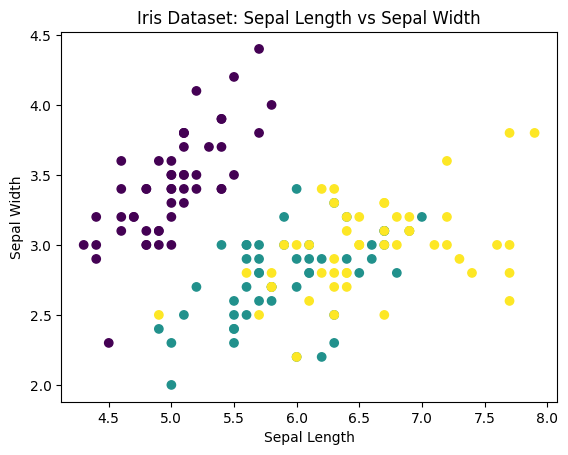

In [2]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset: Sepal Length vs Sepal Width')
plt.show()

In [3]:
from sklearn.cluster import KMeans

# 创建 KMeans 模型
kmeans = KMeans(n_clusters=3, random_state=42)

# 使用 KMeans 聚类
kmeans.fit(X)

# 获取每个样本所属的簇标签
labels = kmeans.labels_

# 获取簇的中心
centroids = kmeans.cluster_centers_

# 输出簇的标签和中心
print("Cluster labels:\n", labels)
print("Cluster centers:\n", centroids)

d:\learnsoftware\python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster labels:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
Cluster centers:
 [[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


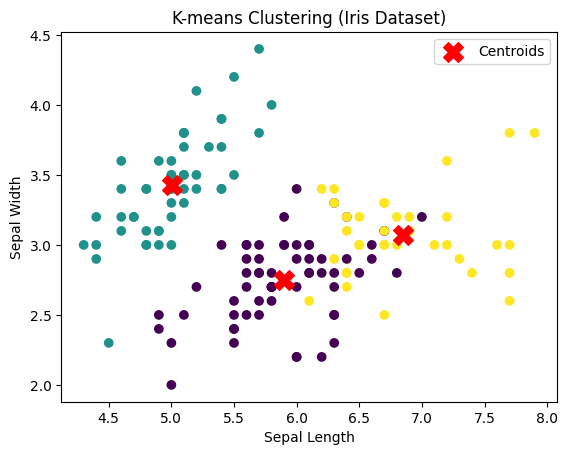

In [4]:
# 可视化聚类结果
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-means Clustering (Iris Dataset)')
plt.legend()
plt.show()

In [5]:
from sklearn.metrics import silhouette_score

# 计算轮廓系数
score = silhouette_score(X, labels)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.5528190123564094


d:\learnsoftware\python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\learnsoftware\python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\learnsoftware\python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\learnsoftware\python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

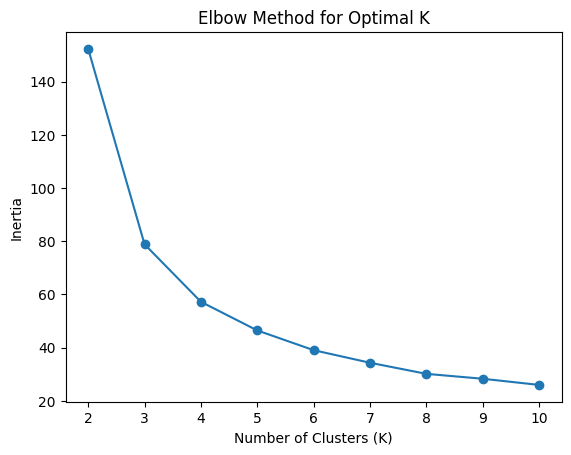

In [6]:
inertia = []
K_range = range(2, 11)  # K 从 2 到 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# 绘制肘部法则图
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

d:\learnsoftware\python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\learnsoftware\python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\learnsoftware\python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\learnsoftware\python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

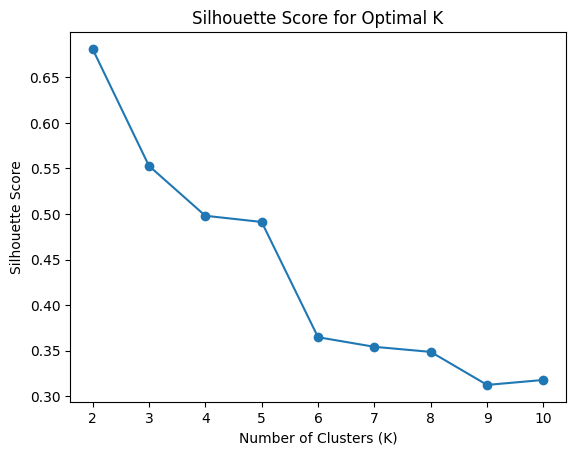

In [7]:
scores = []
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    scores.append(score)

# 绘制轮廓系数图
plt.plot(K_range, scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()

In [8]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, tol=1e-4, random_state=42)
kmeans.fit(X)

d:\learnsoftware\python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

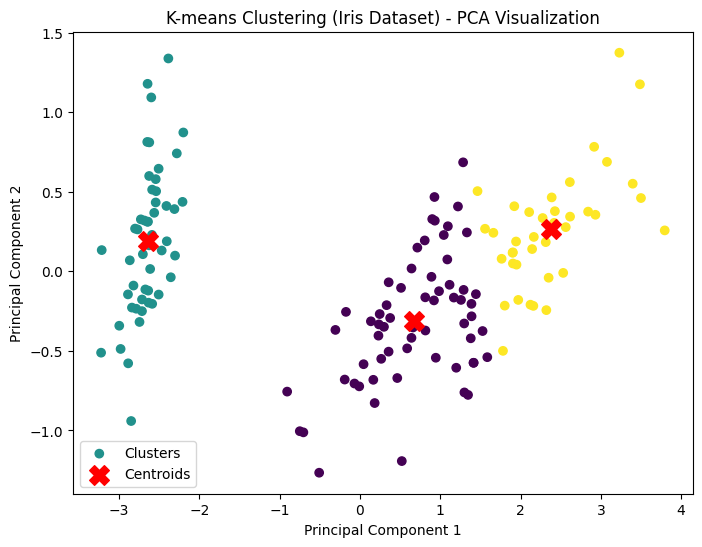

In [9]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 使用 PCA 将数据降维到二维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 可视化聚类结果
plt.figure(figsize=(8, 6))

# 绘制数据点，颜色代表聚类标签
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', label='Clusters')

# 绘制聚类中心
centroids_pca = pca.transform(centroids)  # 将聚类中心降到二维
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, label='Centroids')

# 设置标题和标签
plt.title('K-means Clustering (Iris Dataset) - PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# 显示图形
plt.show()

`make_blobs` 数据集

In [10]:
from sklearn.datasets import make_blobs

# 生成一个包含 4 个簇的数据集
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

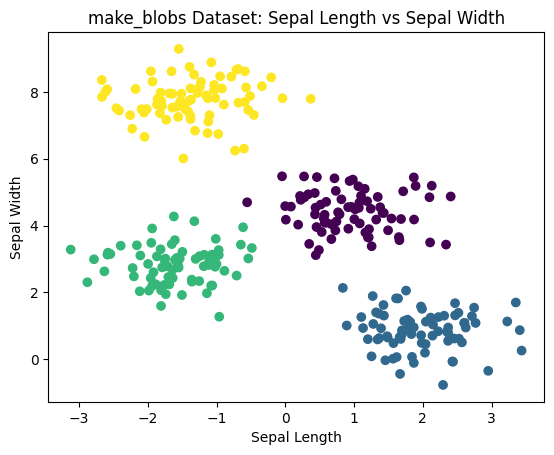

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('make_blobs Dataset: Sepal Length vs Sepal Width')
plt.show()

In [12]:
from sklearn.cluster import KMeans

# 创建 KMeans 模型
kmeans = KMeans(n_clusters=4, random_state=42)

# 使用 KMeans 聚类
kmeans.fit(X)

# 获取每个样本所属的簇标签
labels = kmeans.labels_

# 获取簇的中心
centroids = kmeans.cluster_centers_

# 输出簇的标签和中心
print("Cluster labels:\n", labels)
print("Cluster centers:\n", centroids)

Cluster labels:
 [0 2 1 2 0 0 3 1 2 2 3 2 1 2 0 1 1 0 3 3 0 0 1 3 3 1 0 1 3 1 2 2 1 2 2 2 2
 2 3 0 1 3 1 1 3 3 2 3 2 0 3 0 2 0 0 3 2 3 2 0 2 1 2 3 3 3 2 0 2 3 1 3 2 3
 3 2 3 1 0 2 0 1 0 0 2 1 0 1 2 2 1 0 2 3 3 1 0 0 1 3 2 0 2 0 1 0 0 1 2 1 3
 3 0 2 0 1 2 0 0 1 3 0 3 0 0 0 0 3 0 3 2 3 3 0 2 3 3 2 1 2 2 3 1 3 1 3 2 1
 2 2 2 1 2 1 0 3 2 3 0 1 2 1 1 0 1 3 3 1 0 1 1 2 0 1 3 2 0 0 1 3 0 1 3 3 1
 1 1 1 0 2 1 3 1 1 3 3 3 1 3 2 1 3 0 3 1 2 3 2 1 2 1 3 1 1 2 3 3 0 0 1 2 0
 0 3 0 3 1 2 2 1 1 2 1 0 3 1 0 3 2 3 0 1 0 2 2 2 2 3 3 2 1 3 0 1 3 3 3 0 0
 2 1 1 3 0 2 3 1 2 1 0 0 3 3 1 0 0 0 1 2 2 0 0 1 0 0 0 2 3 2 1 0 0 2 2 2 0
 0 1 2 3]
Cluster centers:
 [[ 1.98258281  0.86771314]
 [ 0.94973532  4.41906906]
 [-1.37324398  7.75368871]
 [-1.58438467  2.83081263]]


d:\learnsoftware\python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


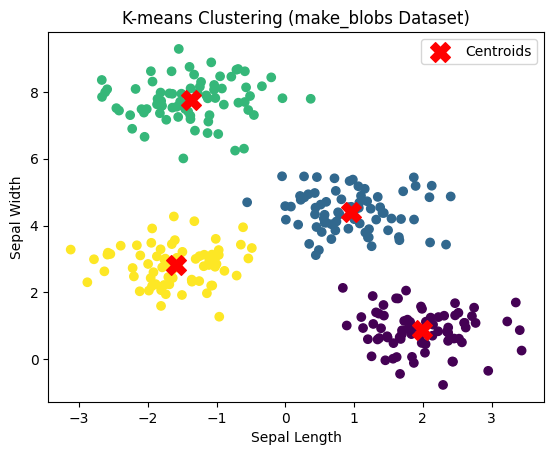

In [13]:
# 可视化聚类结果
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-means Clustering (make_blobs Dataset)')
plt.legend()
plt.show()

In [14]:
from sklearn.metrics import silhouette_score

# 计算轮廓系数
score = silhouette_score(X, labels)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.6819938690643478


d:\learnsoftware\python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\learnsoftware\python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\learnsoftware\python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\learnsoftware\python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

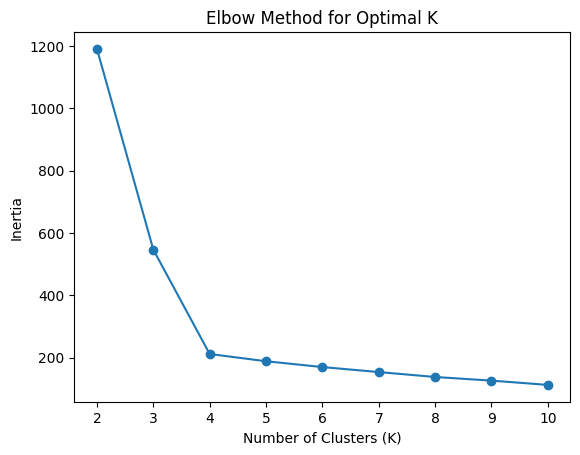

In [15]:
inertia = []
K_range = range(2, 11)  # K 从 2 到 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# 绘制肘部法则图
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

d:\learnsoftware\python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\learnsoftware\python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\learnsoftware\python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\learnsoftware\python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

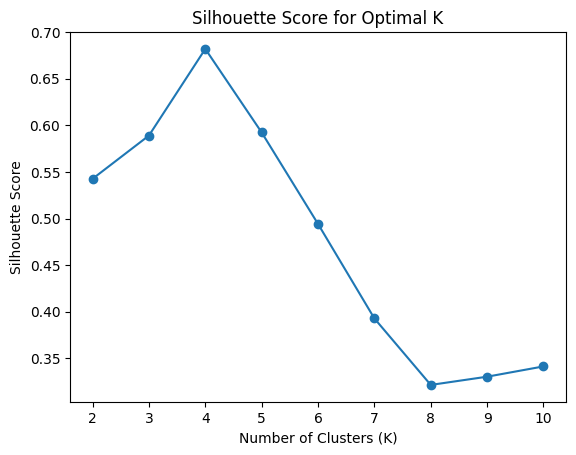

In [16]:
scores = []
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    scores.append(score)

# 绘制轮廓系数图
plt.plot(K_range, scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()

In [17]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, tol=1e-4, random_state=42)
kmeans.fit(X)

d:\learnsoftware\python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

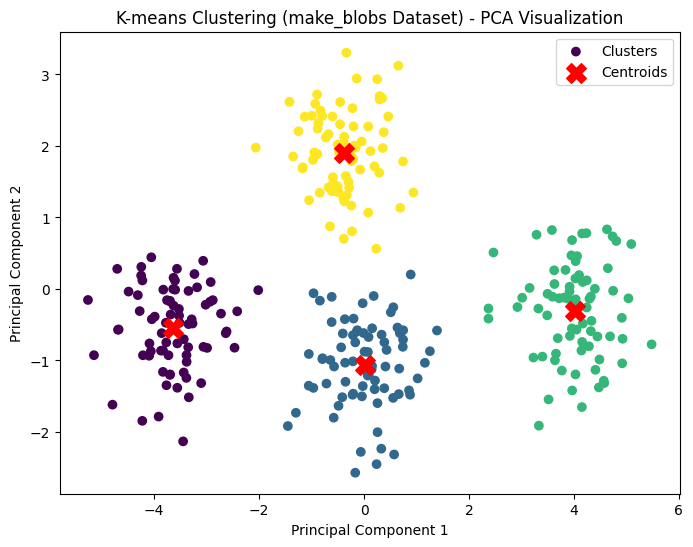

In [18]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 使用 PCA 将数据降维到二维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 可视化聚类结果
plt.figure(figsize=(8, 6))

# 绘制数据点，颜色代表聚类标签
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', label='Clusters')

# 绘制聚类中心
centroids_pca = pca.transform(centroids)  # 将聚类中心降到二维
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, label='Centroids')

# 设置标题和标签
plt.title('K-means Clustering (make_blobs Dataset) - PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# 显示图形
plt.show()

`make_moons`数据集

In [19]:
from sklearn.datasets import make_moons


X, y = make_moons(n_samples=300, noise=0.1, random_state=0)

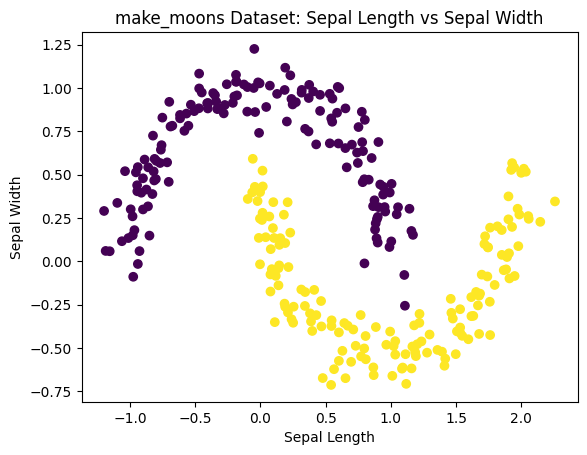

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('make_moons Dataset: Sepal Length vs Sepal Width')
plt.show()

In [21]:
from sklearn.cluster import KMeans

# 创建 KMeans 模型
kmeans = KMeans(n_clusters=3, random_state=42)

# 使用 KMeans 聚类
kmeans.fit(X)

# 获取每个样本所属的簇标签
labels = kmeans.labels_

# 获取簇的中心
centroids = kmeans.cluster_centers_

# 输出簇的标签和中心
print("Cluster labels:\n", labels)
print("Cluster centers:\n", centroids)

d:\learnsoftware\python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster labels:
 [2 0 0 2 2 1 2 2 0 1 2 0 0 2 0 1 2 1 2 0 0 1 1 1 2 1 0 2 2 2 1 0 0 1 2 0 0
 0 2 0 2 1 1 0 0 1 2 0 2 0 1 0 0 1 0 2 0 0 2 0 1 1 0 2 2 2 2 1 2 0 0 2 2 0
 1 2 0 1 0 1 1 0 2 2 2 1 2 2 2 2 2 0 2 0 0 0 1 0 0 0 2 2 1 0 0 2 2 2 2 2 0
 0 0 1 2 0 0 2 1 0 0 1 0 0 1 1 0 0 0 2 1 0 0 1 1 2 2 2 0 2 2 1 2 2 0 1 0 0
 1 2 2 0 2 2 2 1 0 0 2 1 0 1 2 0 0 0 0 0 0 2 2 1 0 0 0 2 1 2 2 0 1 1 2 2 1
 1 2 1 2 1 2 0 0 0 1 2 1 2 1 2 2 2 0 0 0 1 2 1 0 0 2 1 1 1 0 1 2 1 2 2 0 0
 1 0 1 0 1 1 2 2 1 2 1 1 2 0 1 1 0 0 0 2 0 2 1 2 0 0 1 1 1 0 2 2 0 1 0 2 1
 0 0 0 0 2 0 0 0 1 0 2 2 1 2 0 1 0 2 1 2 0 0 0 2 0 2 0 0 1 0 0 2 2 2 2 0 2
 0 1 0 0]
Cluster centers:
 [[ 0.4147927   0.34983143]
 [-0.62583177  0.65732034]
 [ 1.40655957 -0.20035111]]


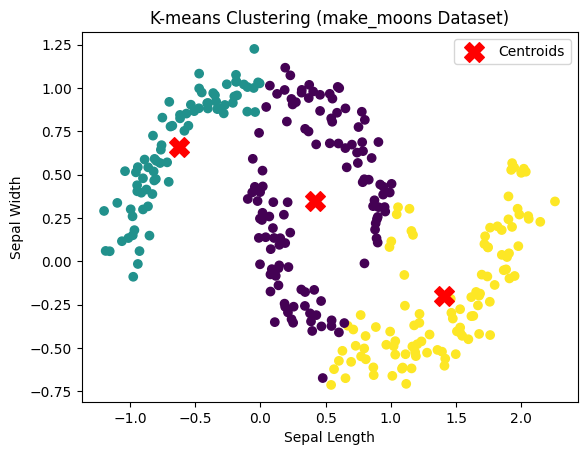

In [22]:
# 可视化聚类结果
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-means Clustering (make_moons Dataset)')
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import silhouette_score

# 计算轮廓系数
score = silhouette_score(X, labels)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.413122576641948


d:\learnsoftware\python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\learnsoftware\python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\learnsoftware\python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\learnsoftware\python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

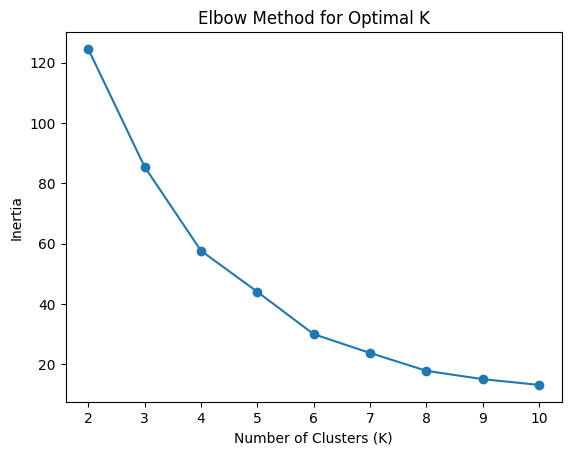

In [24]:
inertia = []
K_range = range(2, 11)  # K 从 2 到 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# 绘制肘部法则图
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

d:\learnsoftware\python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\learnsoftware\python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\learnsoftware\python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\learnsoftware\python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

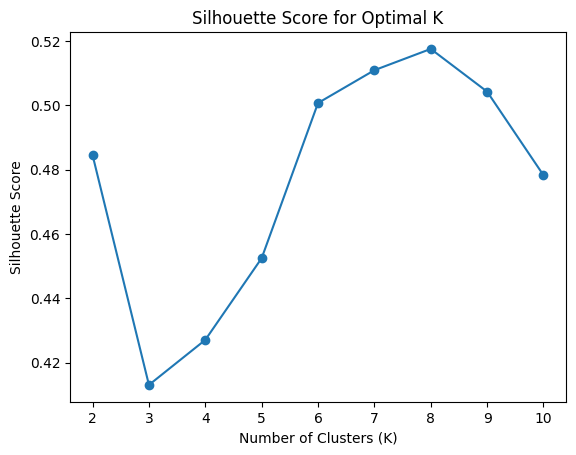

In [25]:
scores = []
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    scores.append(score)

# 绘制轮廓系数图
plt.plot(K_range, scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()

In [26]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, tol=1e-4, random_state=42)
kmeans.fit(X)

d:\learnsoftware\python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

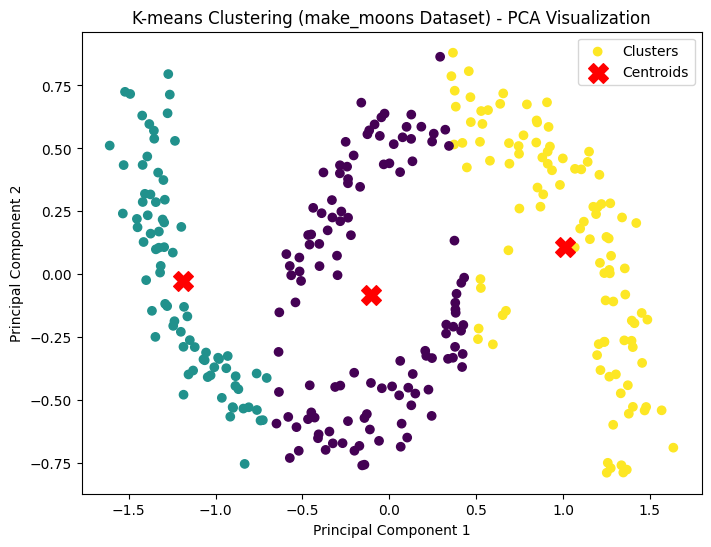

In [27]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 使用 PCA 将数据降维到二维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 可视化聚类结果
plt.figure(figsize=(8, 6))

# 绘制数据点，颜色代表聚类标签
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', label='Clusters')

# 绘制聚类中心
centroids_pca = pca.transform(centroids)  # 将聚类中心降到二维
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, label='Centroids')

# 设置标题和标签
plt.title('K-means Clustering (make_moons Dataset) - PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# 显示图形
plt.show()

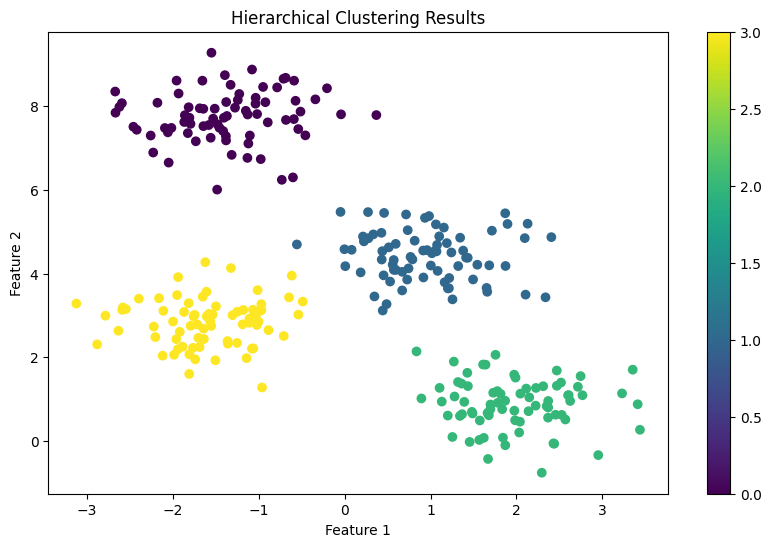

In [33]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
import numpy as np

# 生成数据
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# plt.style.use('seaborn')

# # 显示原始数据
# plt.figure(figsize=(10, 6))
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.6)
# plt.title('Original Data Distribution')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.colorbar()
# plt.show()

# 执行层次聚类
clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
cluster_labels = clustering.fit_predict(X)

# 显示聚类结果
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.colorbar(scatter)
plt.title('Hierarchical Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# # 绘制树状图
# plt.figure(figsize=(12, 8))
# # 计算层次聚类的链接矩阵
# linkage_matrix = linkage(X, method='ward')
# # 绘制树状图
# dendrogram(linkage_matrix)
# plt.title('Hierarchical Clustering Dendrogram')
# plt.xlabel('Sample Index')
# plt.ylabel('Distance')
# plt.show()


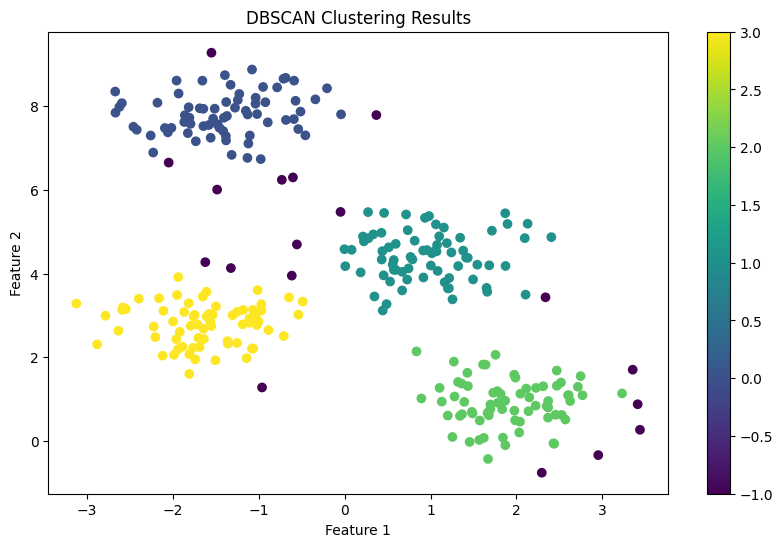

In [35]:
from sklearn.cluster import DBSCAN

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# 使用DBSCAN聚类
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

# 获取聚类标签
labels = dbscan.labels_

# 可视化聚类结果
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


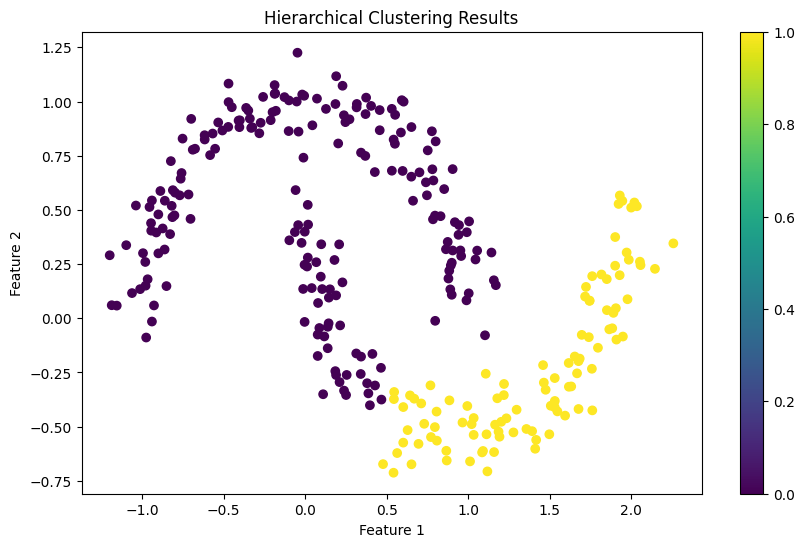

In [36]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
import numpy as np

# 生成数据
X, y = make_moons(n_samples=300, noise=0.1, random_state=0)

# plt.style.use('seaborn')

# # 显示原始数据
# plt.figure(figsize=(10, 6))
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.6)
# plt.title('Original Data Distribution')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.colorbar()
# plt.show()

# 执行层次聚类
clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
cluster_labels = clustering.fit_predict(X)

# 显示聚类结果
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.colorbar(scatter)
plt.title('Hierarchical Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# # 绘制树状图
# plt.figure(figsize=(12, 8))
# # 计算层次聚类的链接矩阵
# linkage_matrix = linkage(X, method='ward')
# # 绘制树状图
# dendrogram(linkage_matrix)
# plt.title('Hierarchical Clustering Dendrogram')
# plt.xlabel('Sample Index')
# plt.ylabel('Distance')
# plt.show()


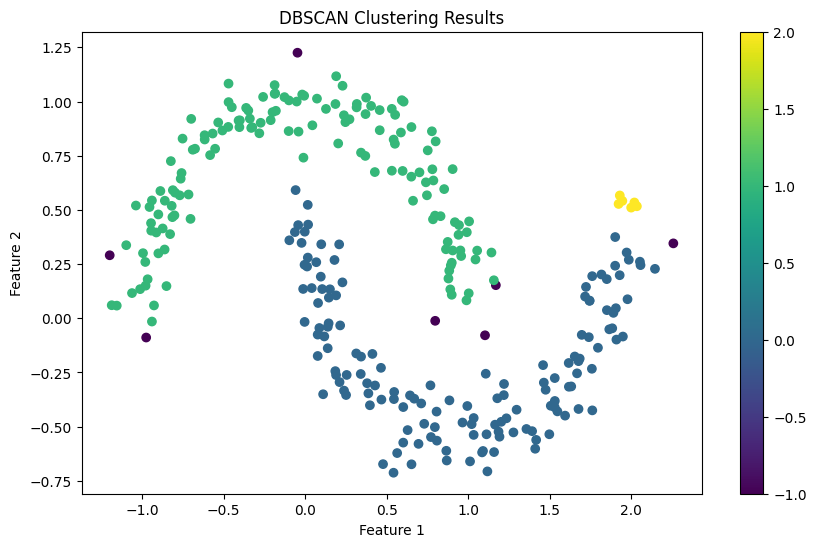

In [39]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X, y = make_moons(n_samples=300, noise=0.1, random_state=0)

# 使用DBSCAN聚类
dbscan = DBSCAN(eps=0.15, min_samples=5)
dbscan.fit(X)

# 获取聚类标签
labels = dbscan.labels_

# 可视化聚类结果
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()